# Regression Model

In [1]:
import pandas as pd
import numpy as np
import glob


import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
selectModel = RandomForestClassifier(n_estimators=100)
from sklearn.ensemble import RandomForestRegressor
regressionModel = RandomForestRegressor()

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


C:\Users\Girijesh\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Import data

In [2]:
filepath = 'E:\datathon'
list_files = glob.glob(filepath + '\*csv')
lis_df = []
for files in list_files:
    df = pd.read_csv(files)
    lis_df.append(df)



In [3]:
df_click_purchase = lis_df[1]

In [4]:
df_orders = lis_df[3]
print(df_orders.shape)
df_orders.head()

(137537, 9)


,order_product_id,order_id,wayfair_product_id,wayfair_website_id,order_date,order_time,customer_id,customer_zip,quantity_ordered
0,8.344710e+18,1.073040e+17,8.089580e+18,Wayfair,7/19/18,9:48:02,3.243950e+18,29464,1
1,7.897050e+18,9.115090e+17,4.407090e+18,Wayfair,7/21/18,15:04:23,7.606760e+18,10928,1
2,3.742700e+17,9.115090e+17,1.327620e+18,Wayfair,7/21/18,15:04:23,7.606760e+18,10928,1
3,7.072690e+18,5.760940e+18,7.293640e+18,Wayfair,7/22/18,21:56:42,3.106940e+18,6712,1
4,7.307240e+18,2.708890e+18,7.264500e+18,Wayfair,7/21/18,12:55:20,1.390570e+18,2468,1


In [5]:
df_orders1 = df_orders.rename(columns={'wayfair_product_id':'product_id'})
df_orders1.head()

,order_product_id,order_id,product_id,wayfair_website_id,order_date,order_time,customer_id,customer_zip,quantity_ordered
0,8.344710e+18,1.073040e+17,8.089580e+18,Wayfair,7/19/18,9:48:02,3.243950e+18,29464,1
1,7.897050e+18,9.115090e+17,4.407090e+18,Wayfair,7/21/18,15:04:23,7.606760e+18,10928,1
2,3.742700e+17,9.115090e+17,1.327620e+18,Wayfair,7/21/18,15:04:23,7.606760e+18,10928,1
3,7.072690e+18,5.760940e+18,7.293640e+18,Wayfair,7/22/18,21:56:42,3.106940e+18,6712,1
4,7.307240e+18,2.708890e+18,7.264500e+18,Wayfair,7/21/18,12:55:20,1.390570e+18,2468,1


In [6]:
lis_df[7].head(3)

,state_fips,state,zipcode,agi_stub,num_returns,num_single,num_joint,num_hoh,num_dependents,num_elderly,...,N19300,A19300,N19500,A19500,N04800,A04800,N07220,A07220,N11901,A11901
0,1,AL,0,1,815440,477700,105350,221200,491310,150920,...,25020,5950,46930,74541,17910,82471,27490,15002,0,0
1,1,AL,0,2,495830,211930,142340,128890,360480,109680,...,64360,17611,102740,243301,44430,292180,43580,45248,0,0
2,1,AL,0,3,263390,83420,137870,36340,182880,75570,...,68320,19479,99920,337719,37110,278272,22780,29166,0,0


In [7]:
df_products = lis_df[4]
print(df_products.shape)
df_products.head()

(498673, 13)


,website_name,product_id,product_name,category_name,description,manufacturer_name,weight,dimension_1,dimension_2,dimension_3,num_reviews,onsite_price,on_promotion
0,Joss US,2.790000e+18,Westgate Upholstered Panel Bed,Beds,The 1882 upholstered bed is sure to appeal to ...,Pulaski Furniture,116.0,59.25,87.50,68.75,7.0,409.99,0
1,Joss US,8.190000e+18,3 Piece Leah Bowl Set,"Boxes, Bins, Baskets, & Buckets",Stack green apples on the breakfast bar or dis...,Three Hands Co.,30.8,23.00,28.35,14.17,0.0,89.99,1
2,Joss US,7.240000e+18,Butter Cups/Ranunculus Sunshine Bulb,Planting & Seeding,Start your own backyard garden or add spring s...,Van Zyverden Inc,1.0,16.00,3.00,4.00,0.0,16.99,0
3,Joss US,4.110000e+18,Freesias Double Blooming Bulb,Planting & Seeding,Start your own backyard garden or add spring s...,Van Zyverden Inc,1.0,24.00,2.00,2.00,2.0,9.99,0
4,Joss US,7.670000e+18,Grand Freesia/Ranunculus Blend Bulb,Planting & Seeding,Start your own backyard garden or add spring s...,Van Zyverden Inc,1.0,36.00,3.00,2.00,2.0,9.99,0


In [8]:
df_taxes = lis_df[7]
df_taxes.head()

,state_fips,state,zipcode,agi_stub,num_returns,num_single,num_joint,num_hoh,num_dependents,num_elderly,...,N19300,A19300,N19500,A19500,N04800,A04800,N07220,A07220,N11901,A11901
0,1,AL,0,1,815440,477700,105350,221200,491310,150920,...,25020,5950,46930,74541,17910,82471,27490,15002,0,0
1,1,AL,0,2,495830,211930,142340,128890,360480,109680,...,64360,17611,102740,243301,44430,292180,43580,45248,0,0
2,1,AL,0,3,263390,83420,137870,36340,182880,75570,...,68320,19479,99920,337719,37110,278272,22780,29166,0,0
3,1,AL,0,4,167190,29420,124060,10610,130160,51540,...,58540,18167,79980,362811,24780,202113,17250,22630,0,0
4,1,AL,0,5,217440,20240,188080,4880,195990,68080,...,117980,44270,151920,1065202,34030,298272,20970,29469,390,155


## Extract features from df_product

In [9]:
columns = ['product_id','weight','num_reviews','onsite_price','on_promotion','description','category_name','manufacturer_name']
df_products1 = df_products.loc[:,columns]
df_products1.head()

,product_id,weight,num_reviews,onsite_price,on_promotion,description,category_name,manufacturer_name
0,2.790000e+18,116.0,7.0,409.99,0,The 1882 upholstered bed is sure to appeal to ...,Beds,Pulaski Furniture
1,8.190000e+18,30.8,0.0,89.99,1,Stack green apples on the breakfast bar or dis...,"Boxes, Bins, Baskets, & Buckets",Three Hands Co.
2,7.240000e+18,1.0,0.0,16.99,0,Start your own backyard garden or add spring s...,Planting & Seeding,Van Zyverden Inc
3,4.110000e+18,1.0,2.0,9.99,0,Start your own backyard garden or add spring s...,Planting & Seeding,Van Zyverden Inc
4,7.670000e+18,1.0,2.0,9.99,0,Start your own backyard garden or add spring s...,Planting & Seeding,Van Zyverden Inc


In [10]:
df = pd.merge(df_orders1, df_products1, on='product_id')
df = df.drop(columns=['order_product_id','order_id','wayfair_website_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80123 entries, 0 to 80122
Data columns (total 13 columns):
product_id           80123 non-null float64
order_date           80123 non-null object
order_time           80123 non-null object
customer_id          80123 non-null float64
customer_zip         80123 non-null object
quantity_ordered     80123 non-null int64
weight               80123 non-null float64
num_reviews          80123 non-null float64
onsite_price         80123 non-null float64
on_promotion         80123 non-null int64
description          80123 non-null object
category_name        80123 non-null object
manufacturer_name    80123 non-null object
dtypes: float64(5), int64(2), object(6)
memory usage: 8.6+ MB


In [11]:
df['order_value'] = df.quantity_ordered*df.onsite_price
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80123 entries, 0 to 80122
Data columns (total 14 columns):
product_id           80123 non-null float64
order_date           80123 non-null object
order_time           80123 non-null object
customer_id          80123 non-null float64
customer_zip         80123 non-null object
quantity_ordered     80123 non-null int64
weight               80123 non-null float64
num_reviews          80123 non-null float64
onsite_price         80123 non-null float64
on_promotion         80123 non-null int64
description          80123 non-null object
category_name        80123 non-null object
manufacturer_name    80123 non-null object
order_value          80123 non-null float64
dtypes: float64(6), int64(2), object(6)
memory usage: 9.2+ MB


## Features int df_taxes

In [12]:
df.customer_zip=df.customer_zip.astype(int)
df = df.rename(columns={'customer_zip':'zipcode'})



In [13]:
df_taxes1 = df_taxes.loc[:,['state','zipcode','num_returns']]
df_taxes1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179796 entries, 0 to 179795
Data columns (total 3 columns):
state          179796 non-null object
zipcode        179796 non-null int64
num_returns    179796 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.1+ MB


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80123 entries, 0 to 80122
Data columns (total 14 columns):
product_id           80123 non-null float64
order_date           80123 non-null object
order_time           80123 non-null object
customer_id          80123 non-null float64
zipcode              80123 non-null int32
quantity_ordered     80123 non-null int64
weight               80123 non-null float64
num_reviews          80123 non-null float64
onsite_price         80123 non-null float64
on_promotion         80123 non-null int64
description          80123 non-null object
category_name        80123 non-null object
manufacturer_name    80123 non-null object
order_value          80123 non-null float64
dtypes: float64(6), int32(1), int64(2), object(5)
memory usage: 8.9+ MB


In [15]:
df_taxes1=df_taxes1.groupby('zipcode').mean()
df = pd.merge(df,df_taxes1,on='zipcode')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79080 entries, 0 to 79079
Data columns (total 15 columns):
product_id           79080 non-null float64
order_date           79080 non-null object
order_time           79080 non-null object
customer_id          79080 non-null float64
zipcode              79080 non-null int32
quantity_ordered     79080 non-null int64
weight               79080 non-null float64
num_reviews          79080 non-null float64
onsite_price         79080 non-null float64
on_promotion         79080 non-null int64
description          79080 non-null object
category_name        79080 non-null object
manufacturer_name    79080 non-null object
order_value          79080 non-null float64
num_returns          79080 non-null float64
dtypes: float64(7), int32(1), int64(2), object(5)
memory usage: 9.4+ MB


## Dummies for categorical parameters

In [16]:
df.order_date=df.order_date.str.replace('\d\/16\/\d+','Monday')
df.order_date=df.order_date.str.replace('\d\/17\/\d+','Tuesday')
df.order_date=df.order_date.str.replace('\d\/18\/\d+','Wednesday')
df.order_date=df.order_date.str.replace('\d\/19\/\d+','Thursday')
df.order_date=df.order_date.str.replace('\d\/20\/\d+','Friday')
df.order_date=df.order_date.str.replace('\d\/21\/\d+','Saturday')
df.order_date=df.order_date.str.replace('\d\/22\/\d+','Sunday')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79080 entries, 0 to 79079
Data columns (total 15 columns):
product_id           79080 non-null float64
order_date           79080 non-null object
order_time           79080 non-null object
customer_id          79080 non-null float64
zipcode              79080 non-null int32
quantity_ordered     79080 non-null int64
weight               79080 non-null float64
num_reviews          79080 non-null float64
onsite_price         79080 non-null float64
on_promotion         79080 non-null int64
description          79080 non-null object
category_name        79080 non-null object
manufacturer_name    79080 non-null object
order_value          79080 non-null float64
num_returns          79080 non-null float64
dtypes: float64(7), int32(1), int64(2), object(5)
memory usage: 9.4+ MB


In [17]:
df2=pd.concat([df,pd.get_dummies(df.order_date)],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79080 entries, 0 to 79079
Data columns (total 22 columns):
product_id           79080 non-null float64
order_date           79080 non-null object
order_time           79080 non-null object
customer_id          79080 non-null float64
zipcode              79080 non-null int32
quantity_ordered     79080 non-null int64
weight               79080 non-null float64
num_reviews          79080 non-null float64
onsite_price         79080 non-null float64
on_promotion         79080 non-null int64
description          79080 non-null object
category_name        79080 non-null object
manufacturer_name    79080 non-null object
order_value          79080 non-null float64
num_returns          79080 non-null float64
Friday               79080 non-null uint8
Monday               79080 non-null uint8
Saturday             79080 non-null uint8
Sunday               79080 non-null uint8
Thursday             79080 non-null uint8
Tuesday              79080 non-n

In [18]:
for i in range(0,12):
    df2.order_time=df2.order_time.str.replace('^'+str(i)+':\S+','morning')
for i in range(12,18):
    df2.order_time=df2.order_time.str.replace('^'+str(i)+':\S+','afternoon')
for i in range(18,24):  
    df2.order_time=df2.order_time.str.replace('^'+str(i)+':\S+','evening')
df2.order_time.value_counts()    

afternoon    28379
evening      27860
morning      22841
Name: order_time, dtype: int64

In [19]:
df2=pd.concat([df2,pd.get_dummies(df2.order_time)],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79080 entries, 0 to 79079
Data columns (total 25 columns):
product_id           79080 non-null float64
order_date           79080 non-null object
order_time           79080 non-null object
customer_id          79080 non-null float64
zipcode              79080 non-null int32
quantity_ordered     79080 non-null int64
weight               79080 non-null float64
num_reviews          79080 non-null float64
onsite_price         79080 non-null float64
on_promotion         79080 non-null int64
description          79080 non-null object
category_name        79080 non-null object
manufacturer_name    79080 non-null object
order_value          79080 non-null float64
num_returns          79080 non-null float64
Friday               79080 non-null uint8
Monday               79080 non-null uint8
Saturday             79080 non-null uint8
Sunday               79080 non-null uint8
Thursday             79080 non-null uint8
Tuesday              79080 non-n

In [20]:
df2['description_length'] = df2.description.str.len()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79080 entries, 0 to 79079
Data columns (total 26 columns):
product_id            79080 non-null float64
order_date            79080 non-null object
order_time            79080 non-null object
customer_id           79080 non-null float64
zipcode               79080 non-null int32
quantity_ordered      79080 non-null int64
weight                79080 non-null float64
num_reviews           79080 non-null float64
onsite_price          79080 non-null float64
on_promotion          79080 non-null int64
description           79080 non-null object
category_name         79080 non-null object
manufacturer_name     79080 non-null object
order_value           79080 non-null float64
num_returns           79080 non-null float64
Friday                79080 non-null uint8
Monday                79080 non-null uint8
Saturday              79080 non-null uint8
Sunday                79080 non-null uint8
Thursday              79080 non-null uint8
Tuesday     

In [21]:
category_count = df2.groupby('category_name')['description_length'].count().reset_index(name = 'category_count')
manu_count = df2.groupby('manufacturer_name')['description_length'].count().reset_index(name = 'manu_count')


In [22]:
df3 = pd.merge(df2,category_count,on='category_name')
df3 = pd.merge(df3,manu_count,on='manufacturer_name')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79080 entries, 0 to 79079
Data columns (total 28 columns):
product_id            79080 non-null float64
order_date            79080 non-null object
order_time            79080 non-null object
customer_id           79080 non-null float64
zipcode               79080 non-null int32
quantity_ordered      79080 non-null int64
weight                79080 non-null float64
num_reviews           79080 non-null float64
onsite_price          79080 non-null float64
on_promotion          79080 non-null int64
description           79080 non-null object
category_name         79080 non-null object
manufacturer_name     79080 non-null object
order_value           79080 non-null float64
num_returns           79080 non-null float64
Friday                79080 non-null uint8
Monday                79080 non-null uint8
Saturday              79080 non-null uint8
Sunday                79080 non-null uint8
Thursday              79080 non-null uint8
Tuesday     

In [23]:
df3['category_rate'] = df3.category_count/(len(df3))
df3['manufacturer_rate'] = df3.manu_count/(len(df3))
df3.head()

,product_id,order_date,order_time,customer_id,zipcode,quantity_ordered,weight,num_reviews,onsite_price,on_promotion,...,Tuesday,Wednesday,afternoon,evening,morning,description_length,category_count,manu_count,category_rate,manufacturer_rate
0,7.842510e+15,Thursday,afternoon,6.231540e+18,61832,1,62.0,511.0,157.31,1,...,0,0,1,0,0,300,154,624,0.001947,0.007891
1,7.842510e+15,Wednesday,afternoon,3.839240e+18,8858,1,62.0,511.0,157.31,1,...,0,1,1,0,0,300,154,624,0.001947,0.007891
2,7.842510e+15,Saturday,morning,4.570650e+18,28054,1,62.0,511.0,157.31,1,...,0,0,0,0,1,300,154,624,0.001947,0.007891
3,7.842510e+15,Wednesday,evening,2.495660e+18,78233,1,62.0,511.0,157.31,1,...,0,1,0,1,0,300,154,624,0.001947,0.007891
4,7.842510e+15,Sunday,morning,7.211280e+18,7036,1,62.0,511.0,157.31,1,...,0,0,0,0,1,300,154,624,0.001947,0.007891


In [24]:
data = df3.drop(columns=['order_date','order_time','description','description','category_name','manufacturer_name',
                        'category_count','manu_count'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79080 entries, 0 to 79079
Data columns (total 23 columns):
product_id            79080 non-null float64
customer_id           79080 non-null float64
zipcode               79080 non-null int32
quantity_ordered      79080 non-null int64
weight                79080 non-null float64
num_reviews           79080 non-null float64
onsite_price          79080 non-null float64
on_promotion          79080 non-null int64
order_value           79080 non-null float64
num_returns           79080 non-null float64
Friday                79080 non-null uint8
Monday                79080 non-null uint8
Saturday              79080 non-null uint8
Sunday                79080 non-null uint8
Thursday              79080 non-null uint8
Tuesday               79080 non-null uint8
Wednesday             79080 non-null uint8
afternoon             79080 non-null uint8
evening               79080 non-null uint8
morning               79080 non-null uint8
description_lengt

In [42]:
data.to_csv('regression_data.csv',index=False)

linear regression, random forest, neural 

# AutoML regression

## TPOT

In [25]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

C:\Users\Girijesh\Anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)
C:\Users\Girijesh\Anaconda3\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [26]:
df = pd.read_csv('regression_data.csv',)
df.head()

,product_id,customer_id,zipcode,quantity_ordered,weight,num_reviews,onsite_price,on_promotion,order_value,num_returns,...,Sunday,Thursday,Tuesday,Wednesday,afternoon,evening,morning,description_length,category_rate,manufacturer_rate
0,7.842510e+15,6.231540e+18,61832,1,62.0,511.0,157.31,1,157.31,2350.000000,...,0,1,0,0,1,0,0,300,0.001947,0.007891
1,7.842510e+15,3.839240e+18,8858,1,62.0,511.0,157.31,1,157.31,63.333333,...,0,0,0,1,1,0,0,300,0.001947,0.007891
2,7.842510e+15,4.570650e+18,28054,1,62.0,511.0,157.31,1,157.31,2795.000000,...,0,0,0,0,0,0,1,300,0.001947,0.007891
3,7.842510e+15,2.495660e+18,78233,1,62.0,511.0,157.31,1,157.31,3675.000000,...,0,0,0,1,0,1,0,300,0.001947,0.007891
4,7.842510e+15,7.211280e+18,7036,1,62.0,511.0,157.31,1,157.31,3731.666667,...,1,0,0,0,0,0,1,300,0.001947,0.007891


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79080 entries, 0 to 79079
Data columns (total 23 columns):
product_id            79080 non-null float64
customer_id           79080 non-null float64
zipcode               79080 non-null int64
quantity_ordered      79080 non-null int64
weight                79080 non-null float64
num_reviews           79080 non-null float64
onsite_price          79080 non-null float64
on_promotion          79080 non-null int64
order_value           79080 non-null float64
num_returns           79080 non-null float64
Friday                79080 non-null int64
Monday                79080 non-null int64
Saturday              79080 non-null int64
Sunday                79080 non-null int64
Thursday              79080 non-null int64
Tuesday               79080 non-null int64
Wednesday             79080 non-null int64
afternoon             79080 non-null int64
evening               79080 non-null int64
morning               79080 non-null int64
description_lengt

In [56]:
features = df.drop(columns=['product_id','customer_id','order_value']).values
target = df['order_value'].values

In [136]:
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    train_size=0.75, test_size=0.25)
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Generation 1 - Current best internal CV score: -25962.50794232748
Generation 2 - Current best internal CV score: -12765.153915385596
Generation 3 - Current best internal CV score: -12765.153915385596
Generation 4 - Current best internal CV score: -10906.2854825143
Generation 5 - Current best internal CV score: -10621.154810500748

Best pipeline: DecisionTreeRegressor(input_matrix, max_depth=10, min_samples_leaf=2, min_samples_split=13)
-6087.0654196421365


# Variable Selection: Forward Sequence

In [46]:
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    train_size=0.75, test_size=0.25)

In [49]:
features.shape[1]

12

In [51]:
#Forward Feature Selection
lr = LinearRegression()
sfs=SFS(lr,
        k_features= features.shape[1],
        forward=True, 
        floating=False,
        n_jobs=-1,
        verbose=2,
        scoring='neg_mean_squared_error',
        cv=10)
sfs=sfs.fit(features,target)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\Girijesh\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x000000AC069F6E40, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Girijesh\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Girijesh\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\G...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000000AC069F6E40, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Girijesh\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Girijesh\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\G...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()
     17 
     18 
     19 
     20 

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "#Forward Feature Selection\nlr = LinearRegression...ror',\n        cv=10)\nsfs=sfs.fit(features,target)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 14, 7, 28, 19, 282426, tzinfo=datetime.timezone.utc), 'msg_id': '0A20340AF5674BB09DC7F5EF2C18B260', 'msg_type': 'execute_request', 'session': 'F0A8FCB1EE9A464A88367977B7FDF1F2', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '0A20340AF5674BB09DC7F5EF2C18B260', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'F0A8FCB1EE9A464A88367977B7FDF1F2']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "#Forward Feature Selection\nlr = LinearRegression...ror',\n        cv=10)\nsfs=sfs.fit(features,target)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 14, 7, 28, 19, 282426, tzinfo=datetime.timezone.utc), 'msg_id': '0A20340AF5674BB09DC7F5EF2C18B260', 'msg_type': 'execute_request', 'session': 'F0A8FCB1EE9A464A88367977B7FDF1F2', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '0A20340AF5674BB09DC7F5EF2C18B260', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'F0A8FCB1EE9A464A88367977B7FDF1F2'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "#Forward Feature Selection\nlr = LinearRegression...ror',\n        cv=10)\nsfs=sfs.fit(features,target)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 14, 7, 28, 19, 282426, tzinfo=datetime.timezone.utc), 'msg_id': '0A20340AF5674BB09DC7F5EF2C18B260', 'msg_type': 'execute_request', 'session': 'F0A8FCB1EE9A464A88367977B7FDF1F2', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '0A20340AF5674BB09DC7F5EF2C18B260', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="#Forward Feature Selection\nlr = LinearRegression...ror',\n        cv=10)\nsfs=sfs.fit(features,target)", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "#Forward Feature Selection\nlr = LinearRegression...ror',\n        cv=10)\nsfs=sfs.fit(features,target)"
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("#Forward Feature Selection\nlr = LinearRegression...ror',\n        cv=10)\nsfs=sfs.fit(features,target)",), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("#Forward Feature Selection\nlr = LinearRegression...ror',\n        cv=10)\nsfs=sfs.fit(features,target)",)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="#Forward Feature Selection\nlr = LinearRegression...ror',\n        cv=10)\nsfs=sfs.fit(features,target)", store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>], cell_name='<ipython-input-51-fbb09c21409d>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at ac997b5358, execution..._before_exec=None error_in_exec=None result=None>)
   2816 
   2817         try:
   2818             for i, node in enumerate(to_run_exec):
   2819                 mod = ast.Module([node])
   2820                 code = compiler(mod, cell_name, "exec")
-> 2821                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000000AC997BDC00, file "<ipython-input-51-fbb09c21409d>", line 11>
        result = <ExecutionResult object at ac997b5358, execution..._before_exec=None error_in_exec=None result=None>
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000000AC997BDC00, file "<ipython-input-51-fbb09c21409d>", line 11>, result=<ExecutionResult object at ac997b5358, execution..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000000AC997BDC00, file "<ipython-input-51-fbb09c21409d>", line 11>
        self.user_global_ns = {'BytesIO': <class '_io.BytesIO'>, 'EFS': <class 'mlxtend.feature_selection.exhaustive_feature_selector.ExhaustiveFeatureSelector'>, 'In': ['', "import pandas as pd\nimport numpy as np\nimport mi...import warnings\nwarnings.filterwarnings('ignore')", "import pandas as pd\nimport numpy as np\n\n\nimport warnings\nwarnings.filterwarnings('ignore')", "filepath = 'E:\\datathon'\nlist_files = glob.glob(...ms_with_purchase.csv')\n# df_click_purchase.head()", "import pandas as pd\nimport numpy as np\nimport gl...import warnings\nwarnings.filterwarnings('ignore')", "filepath = 'E:\\datathon'\nlist_files = glob.glob(...ms_with_purchase.csv')\n# df_click_purchase.head()", 'lis_df[0].head(2)', 'lis_df[1].head(2)', 'lis_df[2].head(2)', 'lis_df[3].head(2)', 'lis_df[2].head(2)', 'lis_df[3].head(2)', 'df_orders = lis_df[3]\nprint(df_orders.shape)\ndf_orders.head()', "df_orders1 = df_orders.rename(columns={'wayfair_product_id':'product_id'})\ndf_orders1.head()", 'df_click_purchase = lis_df[3]', 'df_click_purchase = lis_df[1]', 'lis_df[3].head(3)', 'lis_df[4].head(3)', 'df_products = lis_df[4]\nprint(df_products.shape)\ndf_products.head()', 'lis_df[3].head(3)', ...], 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Out': {6:            customer_id        date      time    ...-07-16  16:49:18   DAILYSALESMAINPAGE           0, 7:            customer_id        date      time    ...    0      0.0  
1  205401096165894320      0.0  , 8:   comp_website_name      comp_product_id  \
0   ...vides more coverage and a soft, ...       21.00  , 9:    order_product_id      order_id  wayfair_produ...23  7.606760e+18        10928                 1  , 10:   comp_website_name      comp_product_id  \
0   ...vides more coverage and a soft, ...       21.00  , 11:    order_product_id      order_id  wayfair_produ...23  7.606760e+18        10928                 1  , 12:    order_product_id      order_id  wayfair_produ...20  1.390570e+18         2468                 1  , 13:    order_product_id      order_id    product_id ...20  1.390570e+18         2468                 1  , 16:    order_product_id      order_id  wayfair_produ...23  7.606760e+18        10928                 1  , 17:   website_name    product_id                    ...          0  
1             1  
2             0  , ...}, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'SCORERS': {'accuracy': make_scorer(accuracy_score), 'adjusted_rand_score': make_scorer(adjusted_rand_score), 'average_precision': make_scorer(average_precision_score, needs_threshold=True), 'balanced_accuracy': make_scorer(balanced_accuracy), 'f1': make_scorer(f1_score), 'f1_macro': make_scorer(f1_score, pos_label=None, average=macro), 'f1_micro': make_scorer(f1_score, pos_label=None, average=micro), 'f1_samples': make_scorer(f1_score, pos_label=None, average=samples), 'f1_weighted': make_scorer(f1_score, pos_label=None, average=weighted), 'log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True), ...}, 'SFS': <class 'mlxtend.feature_selection.sequential_feature_selector.SequentialFeatureSelector'>, 'TPOTRegressor': <class 'tpot.tpot.TPOTRegressor'>, 'X_test': array([['Saturday', '20:45:35', 85044, ..., 'Sho...ildon Home ®', 4393.333333333333]], dtype=object), ...}
        self.user_ns = {'BytesIO': <class '_io.BytesIO'>, 'EFS': <class 'mlxtend.feature_selection.exhaustive_feature_selector.ExhaustiveFeatureSelector'>, 'In': ['', "import pandas as pd\nimport numpy as np\nimport mi...import warnings\nwarnings.filterwarnings('ignore')", "import pandas as pd\nimport numpy as np\n\n\nimport warnings\nwarnings.filterwarnings('ignore')", "filepath = 'E:\\datathon'\nlist_files = glob.glob(...ms_with_purchase.csv')\n# df_click_purchase.head()", "import pandas as pd\nimport numpy as np\nimport gl...import warnings\nwarnings.filterwarnings('ignore')", "filepath = 'E:\\datathon'\nlist_files = glob.glob(...ms_with_purchase.csv')\n# df_click_purchase.head()", 'lis_df[0].head(2)', 'lis_df[1].head(2)', 'lis_df[2].head(2)', 'lis_df[3].head(2)', 'lis_df[2].head(2)', 'lis_df[3].head(2)', 'df_orders = lis_df[3]\nprint(df_orders.shape)\ndf_orders.head()', "df_orders1 = df_orders.rename(columns={'wayfair_product_id':'product_id'})\ndf_orders1.head()", 'df_click_purchase = lis_df[3]', 'df_click_purchase = lis_df[1]', 'lis_df[3].head(3)', 'lis_df[4].head(3)', 'df_products = lis_df[4]\nprint(df_products.shape)\ndf_products.head()', 'lis_df[3].head(3)', ...], 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Out': {6:            customer_id        date      time    ...-07-16  16:49:18   DAILYSALESMAINPAGE           0, 7:            customer_id        date      time    ...    0      0.0  
1  205401096165894320      0.0  , 8:   comp_website_name      comp_product_id  \
0   ...vides more coverage and a soft, ...       21.00  , 9:    order_product_id      order_id  wayfair_produ...23  7.606760e+18        10928                 1  , 10:   comp_website_name      comp_product_id  \
0   ...vides more coverage and a soft, ...       21.00  , 11:    order_product_id      order_id  wayfair_produ...23  7.606760e+18        10928                 1  , 12:    order_product_id      order_id  wayfair_produ...20  1.390570e+18         2468                 1  , 13:    order_product_id      order_id    product_id ...20  1.390570e+18         2468                 1  , 16:    order_product_id      order_id  wayfair_produ...23  7.606760e+18        10928                 1  , 17:   website_name    product_id                    ...          0  
1             1  
2             0  , ...}, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'SCORERS': {'accuracy': make_scorer(accuracy_score), 'adjusted_rand_score': make_scorer(adjusted_rand_score), 'average_precision': make_scorer(average_precision_score, needs_threshold=True), 'balanced_accuracy': make_scorer(balanced_accuracy), 'f1': make_scorer(f1_score), 'f1_macro': make_scorer(f1_score, pos_label=None, average=macro), 'f1_micro': make_scorer(f1_score, pos_label=None, average=micro), 'f1_samples': make_scorer(f1_score, pos_label=None, average=samples), 'f1_weighted': make_scorer(f1_score, pos_label=None, average=weighted), 'log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True), ...}, 'SFS': <class 'mlxtend.feature_selection.sequential_feature_selector.SequentialFeatureSelector'>, 'TPOTRegressor': <class 'tpot.tpot.TPOTRegressor'>, 'X_test': array([['Saturday', '20:45:35', 85044, ..., 'Sho...ildon Home ®', 4393.333333333333]], dtype=object), ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
C:\Users\Girijesh\<ipython-input-51-fbb09c21409d> in <module>()
      6         floating=False,
      7         n_jobs=-1,
      8         verbose=2,
      9         scoring='neg_mean_squared_error',
     10         cv=10)
---> 11 sfs=sfs.fit(features,target)
     12 
     13 
     14 
     15 

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py in fit(self=SequentialFeatureSelector(clone_estimator=True, ...'neg_mean_squared_error',
             verbose=2), X=array([['Thursday', '13:00:39', 61832, ..., 'Din...ensils', 'Cuisinox', 895.0]],
      dtype=object), y=array([157.31, 157.31, 157.31, ...,  31.99,  31.99,  19.9 ]), custom_feature_names=None, **fit_params={})
    344                     k_idx, k_score, cv_scores = self._inclusion(
    345                         orig_set=orig_set,
    346                         subset=prev_subset,
    347                         X=X_,
    348                         y=y,
--> 349                         **fit_params
        fit_params = {}
    350                     )
    351                 else:
    352 
    353                     k_idx, k_score, cv_scores = self._exclusion(

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py in _inclusion(self=SequentialFeatureSelector(clone_estimator=True, ...'neg_mean_squared_error',
             verbose=2), orig_set={0, 1, 2, 3, 4, 5, ...}, subset=set(), X=array([['Thursday', '13:00:39', 61832, ..., 'Din...ensils', 'Cuisinox', 895.0]],
      dtype=object), y=array([157.31, 157.31, 157.31, ...,  31.99,  31.99,  19.9 ]), ignore_feature=None, **fit_params={})
    501                                 pre_dispatch=self.pre_dispatch)
    502             work = parallel(delayed(_calc_score)
    503                             (self, X, y,
    504                              tuple(subset | {feature}),
    505                              **fit_params)
--> 506                             for feature in remaining
        remaining = {0, 1, 2, 3, 4, 5, ...}
    507                             if feature != ignore_feature)
    508 
    509             for new_subset, cv_scores in work:
    510                 all_avg_scores.append(np.nanmean(cv_scores))

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object SequentialFeatureSelector._inclusion.<locals>.<genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Fri Dec 14 02:28:23 2018
PID: 22180             Python 3.6.1: C:\Users\Girijesh\Anaconda3\python.exe
...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _calc_score>, (SequentialFeatureSelector(clone_estimator=True, ...'neg_mean_squared_error',
             verbose=2), array([['Thursday', '13:00:39', 61832, ..., 'Din...ensils', 'Cuisinox', 895.0]],
      dtype=object), array([157.31, 157.31, 157.31, ...,  31.99,  31.99,  19.9 ]), (0,)), {})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _calc_score>
        args = (SequentialFeatureSelector(clone_estimator=True, ...'neg_mean_squared_error',
             verbose=2), array([['Thursday', '13:00:39', 61832, ..., 'Din...ensils', 'Cuisinox', 895.0]],
      dtype=object), array([157.31, 157.31, 157.31, ...,  31.99,  31.99,  19.9 ]), (0,))
        kwargs = {}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py in _calc_score(selector=SequentialFeatureSelector(clone_estimator=True, ...'neg_mean_squared_error',
             verbose=2), X=array([['Thursday', '13:00:39', 61832, ..., 'Din...ensils', 'Cuisinox', 895.0]],
      dtype=object), y=array([157.31, 157.31, 157.31, ...,  31.99,  31.99,  19.9 ]), indices=(0,), **fit_params={})
     29                                  X[:, indices], y,
     30                                  cv=selector.cv,
     31                                  scoring=selector.scorer,
     32                                  n_jobs=1,
     33                                  pre_dispatch=selector.pre_dispatch,
---> 34                                  fit_params=fit_params)
        fit_params = {}
     35     else:
     36         selector.est_.fit(X[:, indices], y, **fit_params)
     37         scores = np.array([selector.scorer(selector.est_, X[:, indices], y)])
     38     return indices, scores

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in cross_val_score(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), X=array([['Thursday'],
       ['Wednesday'],
     ...    ['Sunday'],
       ['Monday']], dtype=object), y=array([157.31, 157.31, 157.31, ...,  31.99,  31.99,  19.9 ]), groups=None, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=KFold(n_splits=10, random_state=None, shuffle=False), n_jobs=1, verbose=0, fit_params={}, pre_dispatch='2*n_jobs')
    135     parallel = Parallel(n_jobs=n_jobs, verbose=verbose,
    136                         pre_dispatch=pre_dispatch)
    137     scores = parallel(delayed(_fit_and_score)(clone(estimator), X, y, scorer,
    138                                               train, test, verbose, None,
    139                                               fit_params)
--> 140                       for train, test in cv_iter)
        cv_iter = [(array([ 7908,  7909,  7910, ..., 79077, 79078, 79079]), array([   0,    1,    2, ..., 7905, 7906, 7907])), (array([    0,     1,     2, ..., 79077, 79078, 79079]), array([ 7908,  7909,  7910, ..., 15813, 15814, 15815])), (array([    0,     1,     2, ..., 79077, 79078, 79079]), array([15816, 15817, 15818, ..., 23721, 23722, 23723])), (array([    0,     1,     2, ..., 79077, 79078, 79079]), array([23724, 23725, 23726, ..., 31629, 31630, 31631])), (array([    0,     1,     2, ..., 79077, 79078, 79079]), array([31632, 31633, 31634, ..., 39537, 39538, 39539])), (array([    0,     1,     2, ..., 79077, 79078, 79079]), array([39540, 39541, 39542, ..., 47445, 47446, 47447])), (array([    0,     1,     2, ..., 79077, 79078, 79079]), array([47448, 47449, 47450, ..., 55353, 55354, 55355])), (array([    0,     1,     2, ..., 79077, 79078, 79079]), array([55356, 55357, 55358, ..., 63261, 63262, 63263])), (array([    0,     1,     2, ..., 79077, 79078, 79079]), array([63264, 63265, 63266, ..., 71169, 71170, 71171])), (array([    0,     1,     2, ..., 71169, 71170, 71171]), array([71172, 71173, 71174, ..., 79077, 79078, 79079]))]
    141     return np.array(scores)[:, 0]
    142 
    143 
    144 def _fit_and_score(estimator, X, y, scorer, train, test, verbose,

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=1), iterable=<generator object cross_val_score.<locals>.<genexpr>>)
    753         self.n_completed_tasks = 0
    754         try:
    755             # Only set self._iterating to True if at least a batch
    756             # was dispatched. In particular this covers the edge
    757             # case of Parallel used with an exhausted iterator.
--> 758             while self.dispatch_one_batch(iterator):
        self.dispatch_one_batch = <bound method Parallel.dispatch_one_batch of Parallel(n_jobs=1)>
        iterator = <generator object cross_val_score.<locals>.<genexpr>>
    759                 self._iterating = True
    760             else:
    761                 self._iterating = False
    762 

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in dispatch_one_batch(self=Parallel(n_jobs=1), iterator=<generator object cross_val_score.<locals>.<genexpr>>)
    603             tasks = BatchedCalls(itertools.islice(iterator, batch_size))
    604             if len(tasks) == 0:
    605                 # No more tasks available in the iterator: tell caller to stop.
    606                 return False
    607             else:
--> 608                 self._dispatch(tasks)
        self._dispatch = <bound method Parallel._dispatch of Parallel(n_jobs=1)>
        tasks = <sklearn.externals.joblib.parallel.BatchedCalls object>
    609                 return True
    610 
    611     def _print(self, msg, msg_args):
    612         """Display the message on stout or stderr depending on verbosity"""

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in _dispatch(self=Parallel(n_jobs=1), batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    566         self.n_dispatched_tasks += len(batch)
    567         self.n_dispatched_batches += 1
    568 
    569         dispatch_timestamp = time.time()
    570         cb = BatchCompletionCallBack(dispatch_timestamp, len(batch), self)
--> 571         job = self._backend.apply_async(batch, callback=cb)
        job = undefined
        self._backend.apply_async = <bound method SequentialBackend.apply_async of <...lib._parallel_backends.SequentialBackend object>>
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
        cb = <sklearn.externals.joblib.parallel.BatchCompletionCallBack object>
    572         self._jobs.append(job)
    573 
    574     def dispatch_next(self):
    575         """Dispatch more data for parallel processing

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\sklearn\externals\joblib\_parallel_backends.py in apply_async(self=<sklearn.externals.joblib._parallel_backends.SequentialBackend object>, func=<sklearn.externals.joblib.parallel.BatchedCalls object>, callback=<sklearn.externals.joblib.parallel.BatchCompletionCallBack object>)
    104             raise ValueError('n_jobs == 0 in Parallel has no meaning')
    105         return 1
    106 
    107     def apply_async(self, func, callback=None):
    108         """Schedule a func to be run"""
--> 109         result = ImmediateResult(func)
        result = undefined
        func = <sklearn.externals.joblib.parallel.BatchedCalls object>
    110         if callback:
    111             callback(result)
    112         return result
    113 

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\sklearn\externals\joblib\_parallel_backends.py in __init__(self=<sklearn.externals.joblib._parallel_backends.ImmediateResult object>, batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    321 
    322 class ImmediateResult(object):
    323     def __init__(self, batch):
    324         # Don't delay the application, to avoid keeping the input
    325         # arguments in memory
--> 326         self.results = batch()
        self.results = undefined
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
    327 
    328     def get(self):
    329         return self.results
    330 

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), array([['Thursday'],
       ['Wednesday'],
     ...    ['Sunday'],
       ['Monday']], dtype=object), array([157.31, 157.31, 157.31, ...,  31.99,  31.99,  19.9 ]), make_scorer(mean_squared_error, greater_is_better=False), array([ 7908,  7909,  7910, ..., 79077, 79078, 79079]), array([   0,    1,    2, ..., 7905, 7906, 7907]), 0, None, {}), {})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), array([['Thursday'],
       ['Wednesday'],
     ...    ['Sunday'],
       ['Monday']], dtype=object), array([157.31, 157.31, 157.31, ...,  31.99,  31.99,  19.9 ]), make_scorer(mean_squared_error, greater_is_better=False), array([ 7908,  7909,  7910, ..., 79077, 79078, 79079]), array([   0,    1,    2, ..., 7905, 7906, 7907]), 0, None, {})
        kwargs = {}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), X=array([['Thursday'],
       ['Wednesday'],
     ...    ['Sunday'],
       ['Monday']], dtype=object), y=array([157.31, 157.31, 157.31, ...,  31.99,  31.99,  19.9 ]), scorer=make_scorer(mean_squared_error, greater_is_better=False), train=array([ 7908,  7909,  7910, ..., 79077, 79078, 79079]), test=array([   0,    1,    2, ..., 7905, 7906, 7907]), verbose=0, parameters=None, fit_params={}, return_train_score=False, return_parameters=False, return_n_test_samples=False, return_times=False, error_score='raise')
    233 
    234     try:
    235         if y_train is None:
    236             estimator.fit(X_train, **fit_params)
    237         else:
--> 238             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method LinearRegression.fit of LinearRegr..., fit_intercept=True, n_jobs=1, normalize=False)>
        X_train = array([['Sunday'],
       ['Sunday'],
       ['S...    ['Sunday'],
       ['Monday']], dtype=object)
        y_train = array([28.99, 22.99, 23.99, ..., 31.99, 31.99, 19.9 ])
        fit_params = {}
    239 
    240     except Exception as e:
    241         # Note fit time as time until error
    242         fit_time = time.time() - start_time

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\sklearn\linear_model\base.py in fit(self=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), X=array([['Sunday'],
       ['Sunday'],
       ['S...    ['Sunday'],
       ['Monday']], dtype=object), y=array([28.99, 22.99, 23.99, ..., 31.99, 31.99, 19.9 ]), sample_weight=None)
    507         self : returns an instance of self.
    508         """
    509 
    510         n_jobs_ = self.n_jobs
    511         X, y = check_X_y(X, y, accept_sparse=['csr', 'csc', 'coo'],
--> 512                          y_numeric=True, multi_output=True)
    513 
    514         if sample_weight is not None and np.atleast_1d(sample_weight).ndim > 1:
    515             raise ValueError("Sample weights must be 1D array or scalar")
    516 

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py in check_X_y(X=array([['Sunday'],
       ['Sunday'],
       ['S...    ['Sunday'],
       ['Monday']], dtype=object), y=array([28.99, 22.99, 23.99, ..., 31.99, 31.99, 19.9 ]), accept_sparse=['csr', 'csc', 'coo'], dtype='numeric', order=None, copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, multi_output=True, ensure_min_samples=1, ensure_min_features=1, y_numeric=True, warn_on_dtype=False, estimator=None)
    516     y_converted : object
    517         The converted and validated y.
    518     """
    519     X = check_array(X, accept_sparse, dtype, order, copy, force_all_finite,
    520                     ensure_2d, allow_nd, ensure_min_samples,
--> 521                     ensure_min_features, warn_on_dtype, estimator)
        ensure_min_features = 1
        warn_on_dtype = False
        estimator = None
    522     if multi_output:
    523         y = check_array(y, 'csr', force_all_finite=True, ensure_2d=False,
    524                         dtype=None)
    525     else:

...........................................................................
C:\Users\Girijesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py in check_array(array=array([['Sunday'],
       ['Sunday'],
       ['S...    ['Sunday'],
       ['Monday']], dtype=object), accept_sparse=['csr', 'csc', 'coo'], dtype=<class 'numpy.float64'>, order=None, copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, ensure_min_samples=1, ensure_min_features=1, warn_on_dtype=False, estimator=None)
    377 
    378     if sp.issparse(array):
    379         array = _ensure_sparse_format(array, accept_sparse, dtype, copy,
    380                                       force_all_finite)
    381     else:
--> 382         array = np.array(array, dtype=dtype, order=order, copy=copy)
        array = array([['Sunday'],
       ['Sunday'],
       ['S...    ['Sunday'],
       ['Monday']], dtype=object)
        dtype = <class 'numpy.float64'>
        order = None
        copy = False
    383 
    384         if ensure_2d:
    385             if array.ndim == 1:
    386                 if ensure_min_samples >= 2:

ValueError: could not convert string to float: 'Sunday'
___________________________________________________________________________

In [30]:
df.columns

Index(['product_id', 'customer_id', 'zipcode', 'quantity_ordered', 'weight',
       'num_reviews', 'onsite_price', 'on_promotion', 'order_value',
       'num_returns', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'afternoon', 'evening', 'morning',
       'description_length', 'category_rate', 'manufacturer_rate'],
      dtype='object')

# Removing the features with low variance:

In [31]:
df.shape #original dataframe

(79080, 23)

In [32]:
selector = VarianceThreshold(threshold= 0.5)
selector.fit_transform(df)
df.shape

(79080, 23)

In [68]:
y= df['order_value']
x = df.drop('order_value', axis =1)

In [80]:
selector = SelectKBest(f_regression, k = 'all').fit(x,y)
names = x.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
name_scores = list(zip(names, scores))
name_score_df = pd.DataFrame(data= name_scores, columns= ['name', 'f_regression'])
name_score_sort_df = name_score_df.sort_values(by = 'f_regression', ascending = False)

In [81]:
def displayScores(ns_df, score):
    plt.figure(figsize=(30,16))
    sns.barplot(x ='name', y=score, data=ns_df)
    plt.xticks(rotation=70, fontsize=20)
    plt.xlabel('Feature',fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel(score,fontsize=20)
    plt.show()

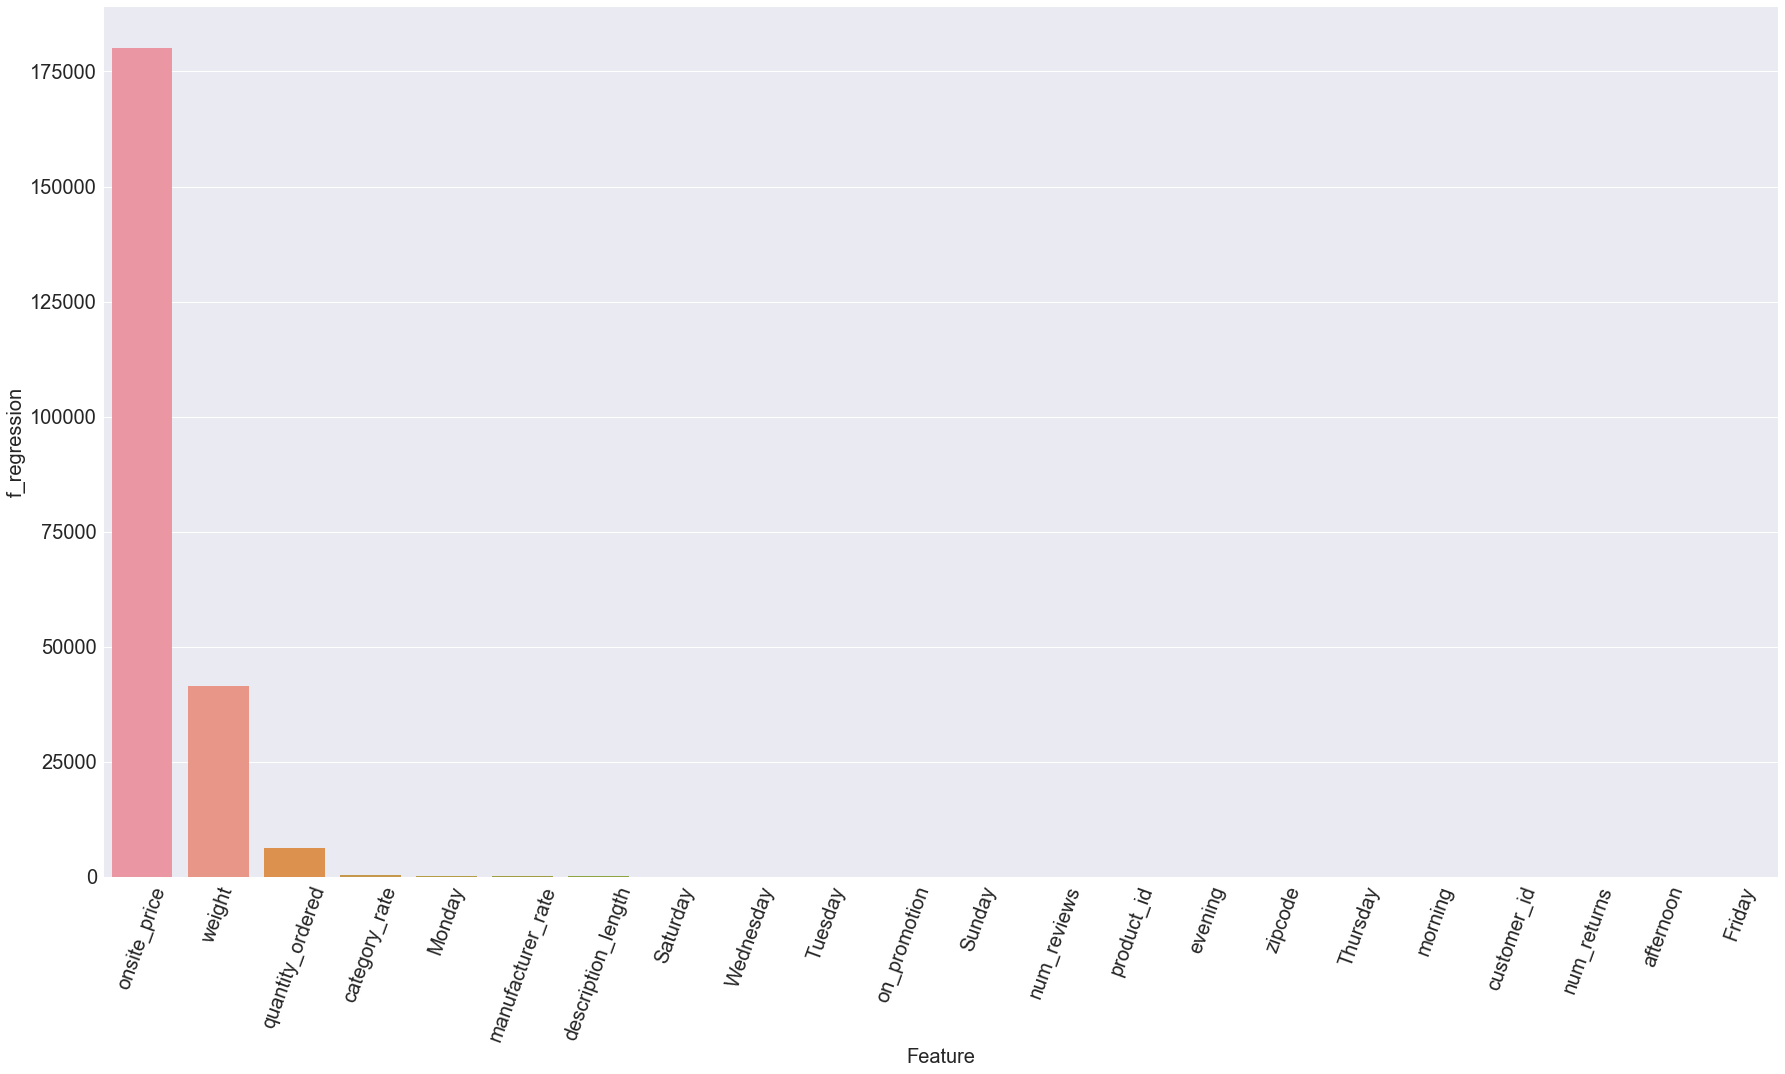

In [82]:
displayScores(name_score_sort_df, 'f_regression')

In [47]:
df3.columns

Index(['product_id', 'order_date', 'order_time', 'customer_id', 'zipcode',
       'quantity_ordered', 'weight', 'num_reviews', 'onsite_price',
       'on_promotion', 'description', 'category_name', 'manufacturer_name',
       'order_value', 'num_returns', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'afternoon', 'evening', 'morning',
       'description_length', 'category_count', 'manu_count', 'category_rate',
       'manufacturer_rate'],
      dtype='object')

In [33]:
#Category rating
cat_value = df3.groupby('category_name')['order_value'].sum().reset_index().sort_values(by= 'order_value', ascending = False)
cat_value['category_rating'] = (cat_value['order_value']/cat_value['order_value'].sum())*100
cat_value.drop('order_value',axis = 1, inplace = True)

#Manufacturer Rating:
man_value = df3.groupby('manufacturer_name')['order_value'].sum().reset_index().sort_values(by = 'order_value', ascending = False)
man_value['manufacturer_rating'] = (man_value['order_value']/man_value['order_value'].sum())*100
man_value.drop('order_value', axis =1, inplace = True)


In [34]:
df4 = pd.merge(df3, cat_value, on= 'category_name')
df5 = pd.merge(df4, man_value, on='manufacturer_name')
df5.drop(['manufacturer_name', 'category_name', 'manufacturer_rate', 'category_rate'], axis=1, inplace= True)

# description rating ??

In [35]:
import nltk
from nltk.corpus import stopwords
# nltk.download()
from nltk.tokenize import word_tokenize

In [36]:
stop_words = set(stopwords.words('english'))

In [39]:
word_token = word_tokenize(df5['description'][0])

In [85]:
# treebank_word_tokenize = TreebankWordTokenizer().tokenizefrom collections import Counter
from nltk import FreqDist, word_tokenize
from collections import Counter
from nltk.corpus import brown

In [73]:
filt = []
from collections import defaultdict

dict_words = defaultdict()

def filt_word(description):
    dict_words = defaultdict()
    token = word_tokenize(description)
#     print(token)
    stop_words = set(stopwords.words('english'))
#     print(stop_words)
    for w in token:
        if w not in stop_words:
            print(w)
            if w not in dict_words:
                dict_wor
    return filt_words

In [117]:
x = Counter()
for line in df5['description'].values:
    x.update(word_tokenize(line))
uniq = x.keys()

In [179]:
word_count = defaultdict()
for words, values in x.items():
#     print(words)
    if words not in stop_words:
        print(words)
        word_count[words]= values
        

In [153]:
lis_count = word_count

In [180]:
import operator
from collections import OrderedDict
sorted_x =  OrderedDict(sorted(word_count.items(), key = lambda kv: kv[1], reverse = True))
for k, v in sorted_x.items():
    print(k,v)

In [167]:
import nltk, re
import string
from collections import Counter
from string import punctuation
from nltk.tokenize import TweetTokenizer, sent_tokenize, word_tokenize
from nltk.corpus import gutenberg, stopwords
from nltk.stem import WordNetLemmatizer
# import global

In [156]:
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in lis_count ]


In [161]:
def preprocessing():
    global word_count
    raw_data = (gutenberg.raw(word_count))
    tokens_sentences = sent_tokenize(raw_data)
    tokens = [[word.lower() for word in line.split()] for line in tokens_sentences]
    print(len(tokens))
    stripped_tokens = [remove_punctuation(i) for i in tokens]
    sw = (stopwords.words('english'))
    filter_set = [[token for token in sentence if (token.lower() not in sw and token.isalnum())] for sentence in
                  stripped_tokens]
    lemma = WordNetLemmatizer()
    lem = []
    for w in filter_set:
        lem.append([wi for wi in map(lemma.lemmatize, w)])
    print(lem)

    return lem

# *************************MODEL **************************************************************************

# H2O Implementation:

In [184]:
df6 = df5.drop(['order_date', 'order_time', 'description'], axis= 1)
df6.to_csv("wayfair.csv")


In [190]:
df7 = pd.read_csv('wayfair.csv')
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79080 entries, 0 to 79079
Data columns (total 26 columns):
Unnamed: 0             79080 non-null int64
product_id             79080 non-null float64
customer_id            79080 non-null float64
zipcode                79080 non-null int64
quantity_ordered       79080 non-null int64
weight                 79080 non-null float64
num_reviews            79080 non-null float64
onsite_price           79080 non-null float64
on_promotion           79080 non-null int64
order_value            79080 non-null float64
num_returns            79080 non-null float64
Friday                 79080 non-null int64
Monday                 79080 non-null int64
Saturday               79080 non-null int64
Sunday                 79080 non-null int64
Thursday               79080 non-null int64
Tuesday                79080 non-null int64
Wednesday              79080 non-null int64
afternoon              79080 non-null int64
evening                79080 non-null int

In [188]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 9.0.4+11, mixed mode)
  Starting server from C:\Users\Girijesh\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Girijesh\AppData\Local\Temp\tmplm24u7l8
  JVM stdout: C:\Users\Girijesh\AppData\Local\Temp\tmplm24u7l8\h2o_Girijesh_started_from_python.out
  JVM stderr: C:\Users\Girijesh\AppData\Local\Temp\tmplm24u7l8\h2o_Girijesh_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,08 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,22 days
H2O cluster name:,H2O_from_python_Girijesh_czuzb3
H2O cluster total nodes:,1
H2O cluster free memory:,2.955 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [189]:
df5_h20 = h2o.import_file('wayfair.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [192]:
x = df5_h20.columns
y = 'order_value'
x.remove('order_value')

In [195]:
aml = H2OAutoML(max_models = 30, max_runtime_secs=300, seed = 1)
aml.train(x= x, y = y, training_frame= df5_h20, leaderboard_frame= df5_h20)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [196]:
aml.leaderboard.as_data_frame()

,model_id,mean_residual_deviance,rmse,mse,mae,rmsle
0,StackedEnsemble_AllModels_AutoML_20181214_211548,1813.145111,42.581042,1813.145111,10.344102,NaN
1,StackedEnsemble_BestOfFamily_AutoML_20181214_2...,1813.145111,42.581042,1813.145111,10.344102,NaN
2,DRF_1_AutoML_20181214_211548,2130.669414,46.159175,2130.669414,4.590798,0.045098
3,DRF_1_AutoML_20181214_212647,2275.367753,47.700815,2275.367753,4.737439,0.045384
4,XRT_1_AutoML_20181214_212647,2495.287995,49.952858,2495.287995,5.665747,0.051432
5,XRT_1_AutoML_20181214_211548,2495.287995,49.952858,2495.287995,5.665747,0.051432
6,GLM_grid_1_AutoML_20181214_212647_model_1,374699.407358,612.126954,374699.407358,262.615097,1.515323
7,GLM_grid_1_AutoML_20181214_211548_model_1,374699.407358,612.126954,374699.407358,262.615097,1.515323


# Linear Regresssion:

In [197]:
import pathlib
import zipfile
from io import BytesIO
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import glob
import numpy as np
from sklearn.metrics import *
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import sklearn
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import statsmodels.api as sm
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn import preprocessing
from math import sqrt

In [199]:
features = df7.drop(columns=['product_id','customer_id','order_value']).values
target = df7['order_value'].values

In [200]:
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    train_size=0.75, test_size=0.25)

In [201]:
#Function for Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_arr_true, y_arr_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_arr_true - y_arr_pred) / y_arr_true)) * 100

# Training 

In [202]:
#Training dataset:
lm = LinearRegression()
lm.fit(X_train, y_train)
train_pred = lm.predict(X_train)

In [203]:
#Mean Absolute Error:
#RMSE:
#MAPE:
print("MAE:" + str(mean_absolute_error(y_train, train_pred)))
print("RMS: " + str(sqrt(mean_squared_error(y_train, train_pred))))
print("MAPE: " + str(mean_absolute_percentage_error(y_train, train_pred)))

MAE:59.41379021136503
RMS: 296.25327549722067
MAPE: 55.74466065034095


# Testing:

In [205]:
test_pred = lm.predict(X_test)

In [208]:
print("MAE:" + str(mean_absolute_error(y_test, test_pred)))
print("RMS: " + str(sqrt(mean_squared_error(y_test, test_pred))))
print("MAPE: " + str(mean_absolute_percentage_error(y_test, test_pred)))

MAE:58.73361460866351
RMS: 288.3207785371299
MAPE: 54.88796171507976


# Random Forest

# Training

In [209]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators= 1000, random_state= 42)

In [210]:
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [212]:
train_predict_rf = clf.predict(X_train)

In [213]:
print("MAE:" + str(mean_absolute_error(y_train, train_predict_rf)))
print("RMS: " + str(sqrt(mean_squared_error(y_train, train_predict_rf))))
print("MAPE: " + str(mean_absolute_percentage_error(y_train, train_predict_rf)))

MAE:0.6508129517798722
RMS: 31.990554348956703
MAPE: 0.024140004005520327


# Testing

In [218]:
test_predict_rf = clf.predict(X_test)

print("MAE:" + str(mean_absolute_error(y_test, test_predict_rf)))
print("RMS: " + str(sqrt(mean_squared_error(y_test, test_predict_rf))))
print("MAPE: " + str(mean_absolute_percentage_error(y_test, test_predict_rf)))

MAE:1.1473407420343684
RMS: 47.688213027304904
MAPE: 0.04146995207964064


# Neural Networks

In [219]:
# Importing the Keras libraries and package
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Trianing

In [223]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 23))

# Adding the second hidden layer
classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform'))

# Compiling the ANN
classifier.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [224]:
classifier.fit(X_train, y_train,  batch_size = 126, epochs = 100, verbose= 2, shuffle= True)

Epoch 1/100
 - 2s - loss: 444734.3987
Epoch 2/100
 - 1s - loss: 444494.6588
Epoch 3/100
 - 1s - loss: 444264.4566
Epoch 4/100
 - 1s - loss: 444034.8381
Epoch 5/100
 - 1s - loss: 443805.6380
Epoch 6/100
 - 1s - loss: 443577.2965
Epoch 7/100
 - 1s - loss: 443349.4017
Epoch 8/100
 - 1s - loss: 443122.2458
Epoch 9/100
 - 1s - loss: 442895.4552
Epoch 10/100
 - 1s - loss: 442669.5187
Epoch 11/100
 - 1s - loss: 442443.9180
Epoch 12/100
 - 1s - loss: 442218.4513
Epoch 13/100
 - 1s - loss: 441993.4246
Epoch 14/100
 - 1s - loss: 441768.5535
Epoch 15/100
 - 1s - loss: 441544.5372
Epoch 16/100
 - 1s - loss: 441321.0821
Epoch 17/100
 - 1s - loss: 441097.9828
Epoch 18/100
 - 1s - loss: 440874.9576
Epoch 19/100
 - 1s - loss: 440652.2930
Epoch 20/100
 - 1s - loss: 440430.3176
Epoch 21/100
 - 1s - loss: 440208.6922
Epoch 22/100
 - 1s - loss: 439987.7022
Epoch 23/100
 - 1s - loss: 439766.7181
Epoch 24/100
 - 1s - loss: 439546.1417
Epoch 25/100
 - 1s - loss: 439326.4192
Epoch 26/100
 - 1s - loss: 439107.

In [225]:
train_pred_ann = classifier.predict(X_train)

In [ ]:
print("MAE:" + str(mean_absolute_error(y_train, train_pred_ann)))
print("RMS: " + str(sqrt(mean_squared_error(y_train, train_pred_ann))))
print("MAPE: " + str(mean_absolute_percentage_error(y_train, train_pred_ann)))

MAE:215.69014876955555
RMS: 651.1622014027478


# Testing

In [228]:
pred_test_ann = classifier.predict(X_test)

In [229]:
print("MAE:" + str(mean_absolute_error(y_test, pred_test_ann)))
print("RMS: " + str(sqrt(mean_squared_error(y_test, pred_test_ann))))
print("MAPE: " + str(mean_absolute_percentage_error(y_test, pred_test_ann)))

MAE:211.70253788653127
RMS: 628.1829339995386
MAPE: 75.10450877591661
